In [1]:
import numpy as np
import pandas as pd

import helpers
from helpers.cell_type_naming import weird_to_nice

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [3]:
import logging

In [4]:
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logging.getLogger().addHandler(handler)

In [5]:
logging.getLogger("helpers").setLevel("DEBUG")
logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")

In [6]:
rng = np.random.default_rng(seed=0)

# load & prep data

In [7]:
!gsutil ls gs://liulab/downloaded_manually/derek_csx_tcga_skcm

gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_cell_type_sourceGEP.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.csv
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.html
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.pdf
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_error_log.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_runtime_log.txt
gs:

## real TCGA bulk samples

### load TCGA SKCM samples

In [56]:
mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm()

In [59]:
mixtures_tcga_skcm

sample_id,TCGA-3N-A9WB-06A-11R-A38C-07,TCGA-3N-A9WC-06A-11R-A38C-07,TCGA-3N-A9WD-06A-11R-A38C-07,TCGA-BF-A1PU-01A-11R-A18S-07,TCGA-BF-A1PV-01A-11R-A18U-07,TCGA-BF-A1PX-01A-12R-A18T-07,TCGA-BF-A1PZ-01A-11R-A18S-07,TCGA-BF-A1Q0-01A-21R-A18S-07,TCGA-BF-A3DJ-01A-11R-A20F-07,TCGA-BF-A3DL-01A-11R-A20F-07,...,TCGA-XV-AB01-06A-12R-A40A-07,TCGA-YD-A89C-06A-11R-A37K-07,TCGA-YD-A9TA-06A-11R-A39D-07,TCGA-YD-A9TB-06A-12R-A40A-07,TCGA-YG-AA3N-01A-11R-A38C-07,TCGA-YG-AA3O-06A-11R-A38C-07,TCGA-YG-AA3P-06A-11R-A38C-07,TCGA-Z2-A8RT-06A-11R-A37K-07,TCGA-Z2-AA3S-06A-11R-A39D-07,TCGA-Z2-AA3V-06A-11R-A39D-07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,19.740875,10.369330,14.257515,8.356213,12.480939,13.381595,21.218028,15.880855,11.437546,15.883137,...,16.366698,8.811148,4.867023,15.167823,11.002386,11.587025,1.617723,17.433731,18.990391,26.051613
A1CF,0.000000,0.000000,0.028019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.074203,0.000000,0.000000,0.000000,0.000000,0.020087,0.000000,0.000000
A2BP1,0.000000,0.000000,0.252178,0.061521,0.000000,0.000000,0.000000,0.000000,0.000000,0.020444,...,0.000000,0.000000,0.000000,0.000000,0.025433,0.018830,3.184092,0.000000,0.015651,0.023752
A2LD1,12.961332,8.540326,3.840093,7.732546,3.503615,5.900259,3.942612,3.279326,4.576888,4.165400,...,1.813268,4.891449,2.033552,8.392148,4.064287,4.806950,2.411947,1.933933,8.313469,1.843167
A2M,114.462646,8990.935642,721.327094,318.164904,100.181732,1506.774877,160.847095,313.319162,18599.722553,322.278302,...,665.860798,985.532588,682.319652,1460.927230,474.432192,2079.134869,396.044863,1146.847675,219.565726,1674.906699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,64.044031,190.962875,129.198585,243.114657,295.161620,219.491335,158.803870,531.532912,149.791155,300.282398,...,439.809043,252.882485,203.726404,173.244503,468.914976,174.115119,92.800828,148.479867,116.130025,429.795422
ZZEF1,32.262626,46.946197,43.682628,85.083208,63.164141,65.641810,82.394776,62.370800,65.757418,61.430229,...,55.869623,40.712054,68.527168,61.857779,108.823473,148.827285,71.359575,95.853073,89.147794,51.328428
ZZZ3,37.367734,60.447760,30.401313,13.549949,95.485875,24.458629,32.554792,41.569166,47.379281,12.551798,...,8.567026,35.496273,52.777417,42.540575,49.134598,52.402116,48.377633,23.541452,78.927726,3.705338


## pseudobulk samples

### load Jerby-Arnon scRNA-seq cohort

In [12]:
sc_data, sc_metadata = helpers.datasets.load_jerby_arnon(
    # n_genes=100
)

In [13]:
sc_data

single_cell_id,CY106_CD45neg_CD90neg_10cells_S289,CY106_CD45neg_CD90neg_S291,CY106_CD45neg_CD90neg_S292,CY106_CD45neg_CD90neg_S294,CY106_CD45neg_CD90neg_S297,CY106_CD45neg_CD90neg_S301,CY106_CD45neg_CD90neg_S302,CY106_CD45neg_CD90neg_S308,CY106_CD45neg_CD90neg_S310,CY106_CD45neg_CD90neg_S320,...,monika_E9_S143_comb_BCD8_3,monika_F10_S145_comb_BCD8_3,monika_F1_S144_comb_BCD8_3,monika_F2_S146_comb_BCD8_3,monika_F4_S147_comb_BCD8_3,monika_F5_S148_comb_BCD8_3,monika_F6_S149_comb_BCD8_3,monika_F7_S150_comb_BCD8_3,monika_F8_S151_comb_BCD8_3,monika_F9_S152_comb_BCD8_3
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.900722,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482332,0.000000,0.000000
A1BG-AS1,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.328836,0.000000,0.000000,0.000000,3.593354,3.595146,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.005759,0.000000,0.000000,...,0.067639,2.510709,0.021480,0.000000,0.027154,0.070389,0.034216,0.057970,0.000000,0.093560
A2M,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.639695,0.000000,0.000000,0.000000,0.000000,0.000000,5.437760,0.000000
A2M-AS1,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314986,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.151859,0.038436,0.000000,0.0229,0.116365,0.000000,0.066261,0.088142,0.035624,0.051024,...,1.357270,2.597650,1.004322,0.983313,1.597889,0.835924,1.085425,1.196607,0.747602,2.592158
ZYG11B,0.000000,0.000000,0.015783,0.0229,0.000000,0.001442,0.000000,0.037031,0.017209,0.066261,...,0.853597,1.770618,0.492622,0.632268,0.913799,0.299831,0.609755,0.755315,0.590722,2.141106
ZYX,0.299831,1.227125,0.422233,0.0000,1.614945,0.000000,0.993493,2.870661,0.000000,0.000000,...,0.000000,2.849599,4.183645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
sc_metadata

,single_cell_id,sample_id,cell_type,treatment.group,Cohort,no.of.genes,no.of.reads
single_cell_id,,,,,,,
CY106_CD45neg_CD90neg_10cells_S289,CY106_CD45neg_CD90neg_10cells_S289,Mel106,NaN,post.treatment,New,2518,1912305
CY106_CD45neg_CD90neg_S291,CY106_CD45neg_CD90neg_S291,Mel106,Malignant,post.treatment,New,3071,1945194
CY106_CD45neg_CD90neg_S292,CY106_CD45neg_CD90neg_S292,Mel106,Malignant,post.treatment,New,4848,3268805
CY106_CD45neg_CD90neg_S294,CY106_CD45neg_CD90neg_S294,Mel106,Malignant,post.treatment,New,2953,2155551
CY106_CD45neg_CD90neg_S297,CY106_CD45neg_CD90neg_S297,Mel106,Malignant,post.treatment,New,3680,3651531
...,...,...,...,...,...,...,...
monika_F5_S148_comb_BCD8_3,monika_F5_S148_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,6154,1557222
monika_F6_S149_comb_BCD8_3,monika_F6_S149_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,6312,1638252
monika_F7_S150_comb_BCD8_3,monika_F7_S150_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,5767,1132051


In [15]:
sc_metadata["cell_type"].value_counts(dropna=False)

Malignant      2018
T CD8          1759
T CD4           856
B               818
T               706
Macrophage      420
NaN             307
CAF             106
Endothelial     104
NK               92
Name: cell_type, dtype: int64

### load fractions produced by derek

In [63]:
csx_fraction_output_tcga_skcm = helpers.datasets.load_tcga_skcm_fractions_from_csx()

In [64]:
csx_fraction_output_tcga_skcm

cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
sample_id,,,,,,,,,
TCGA-3N-A9WB-06A-11R-A38C-07,0.000000,0.018483,0.004211,0.000000,0.971059,0.000000,0.006247,0.000000,0.000000
TCGA-3N-A9WC-06A-11R-A38C-07,0.035060,0.056463,0.004178,0.103408,0.669623,0.000000,0.000000,0.082836,0.048432
TCGA-3N-A9WD-06A-11R-A38C-07,0.044227,0.105762,0.070834,0.036322,0.703525,0.000000,0.000000,0.039330,0.000000
TCGA-BF-A1PU-01A-11R-A18S-07,0.020758,0.048434,0.015335,0.000000,0.912796,0.002677,0.000000,0.000000,0.000000
TCGA-BF-A1PV-01A-11R-A18U-07,0.003591,0.042464,0.000000,0.000000,0.944365,0.000000,0.000000,0.009580,0.000000
...,...,...,...,...,...,...,...,...,...
TCGA-YG-AA3O-06A-11R-A38C-07,0.007658,0.060723,0.000000,0.026970,0.896399,0.000000,0.008250,0.000000,0.000000
TCGA-YG-AA3P-06A-11R-A38C-07,0.000000,0.000000,0.002483,0.008485,0.969895,0.000000,0.019137,0.000000,0.000000
TCGA-Z2-A8RT-06A-11R-A37K-07,0.029734,0.026755,0.002953,0.044928,0.878121,0.000000,0.000000,0.017508,0.000000


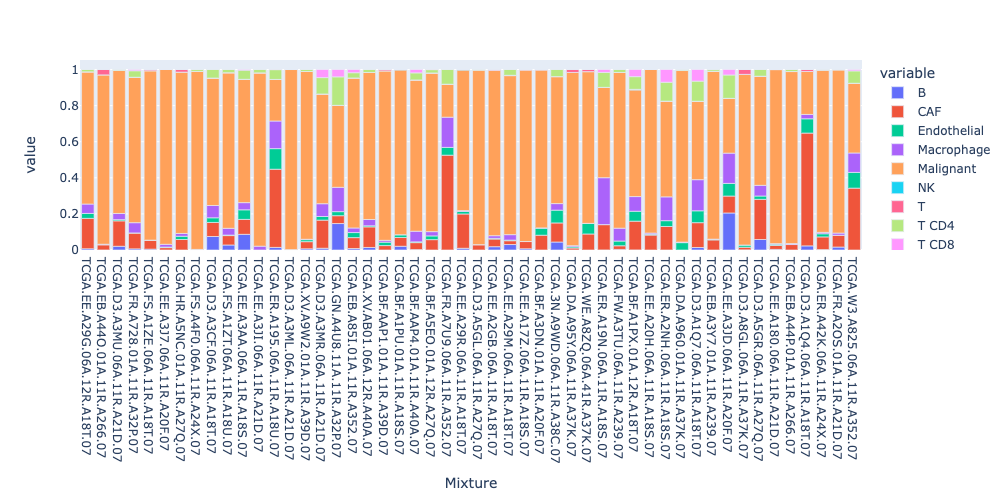

In [19]:
px.bar(csx_fraction_output_tcga_skcm.sample(50))

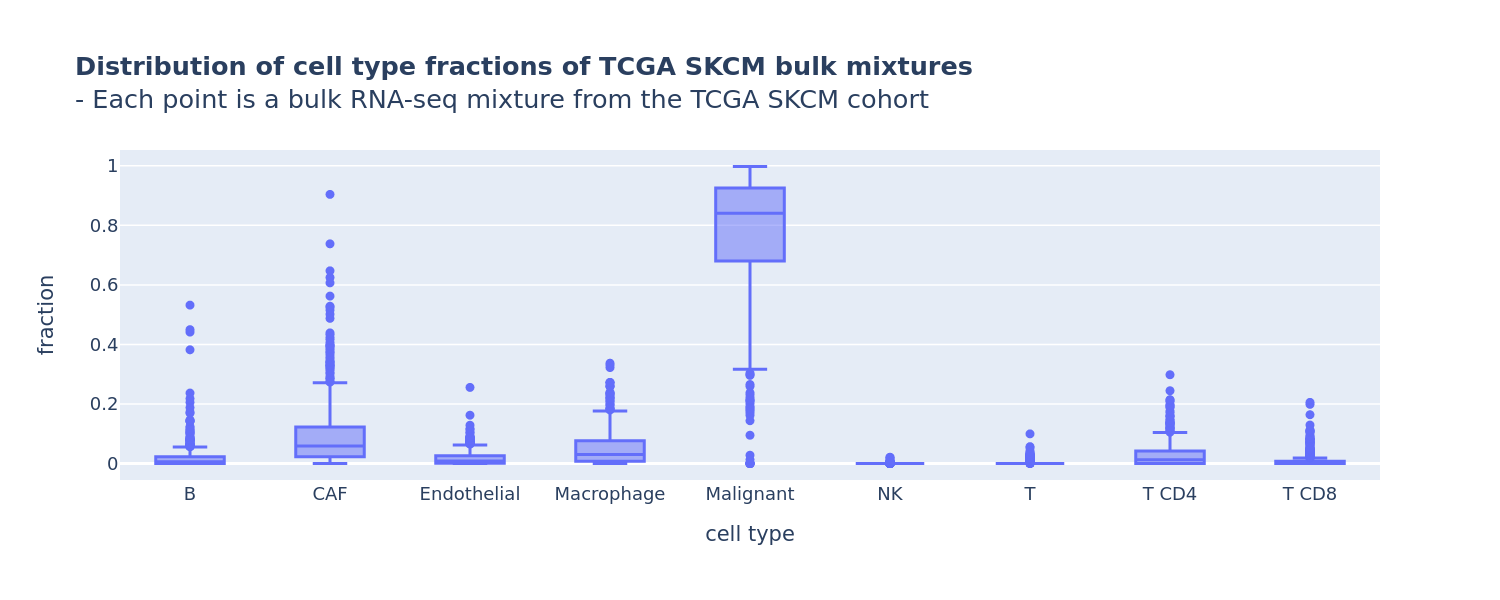

In [20]:
title = (
    "<b>Distribution of cell type fractions of TCGA SKCM bulk mixtures</b>"
    "<br>- Each point is a bulk RNA-seq mixture from the TCGA SKCM cohort"
)

fig = px.box(csx_fraction_output_tcga_skcm, title=title)

# fig.update_layout(font_size=12)
fig.update_xaxes(title="cell type")
fig.update_yaxes(title="fraction")

fig.show(width=1000, height=400, scale=1.5, renderer="png")

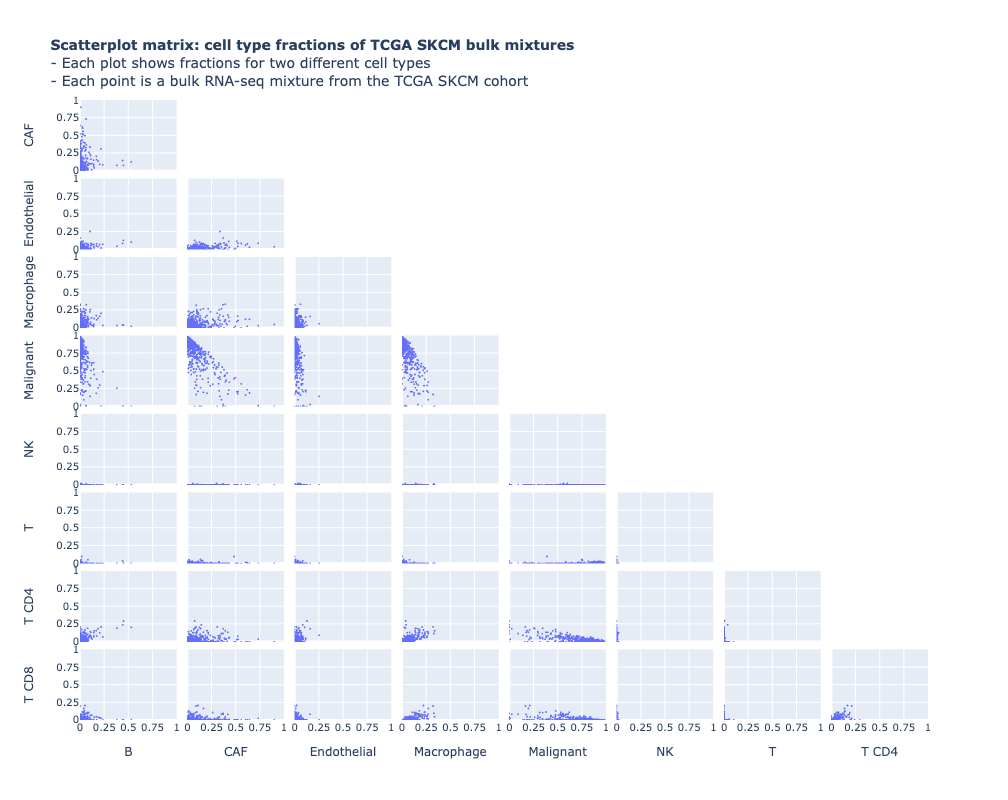

In [21]:
title = (
    "<b>Scatterplot matrix: cell type fractions of TCGA SKCM bulk mixtures</b>"
    "<br>- Each plot shows fractions for two different cell types"
    "<br>- Each point is a bulk RNA-seq mixture from the TCGA SKCM cohort"
)

fig = px.scatter_matrix(
    csx_fraction_output_tcga_skcm,
    title=title,
)
fig.update_layout(font_size=10)
fig.update_layout({f"xaxis{i + 1}": dict(range=[0, 1], dtick=0.25) for i in range(9)})
fig.update_layout({f"yaxis{i + 1}": dict(range=[0, 1], dtick=0.25) for i in range(9)})
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker=dict(size=2))
fig.update_traces(showupperhalf=False)

fig.show(width=800, height=800)

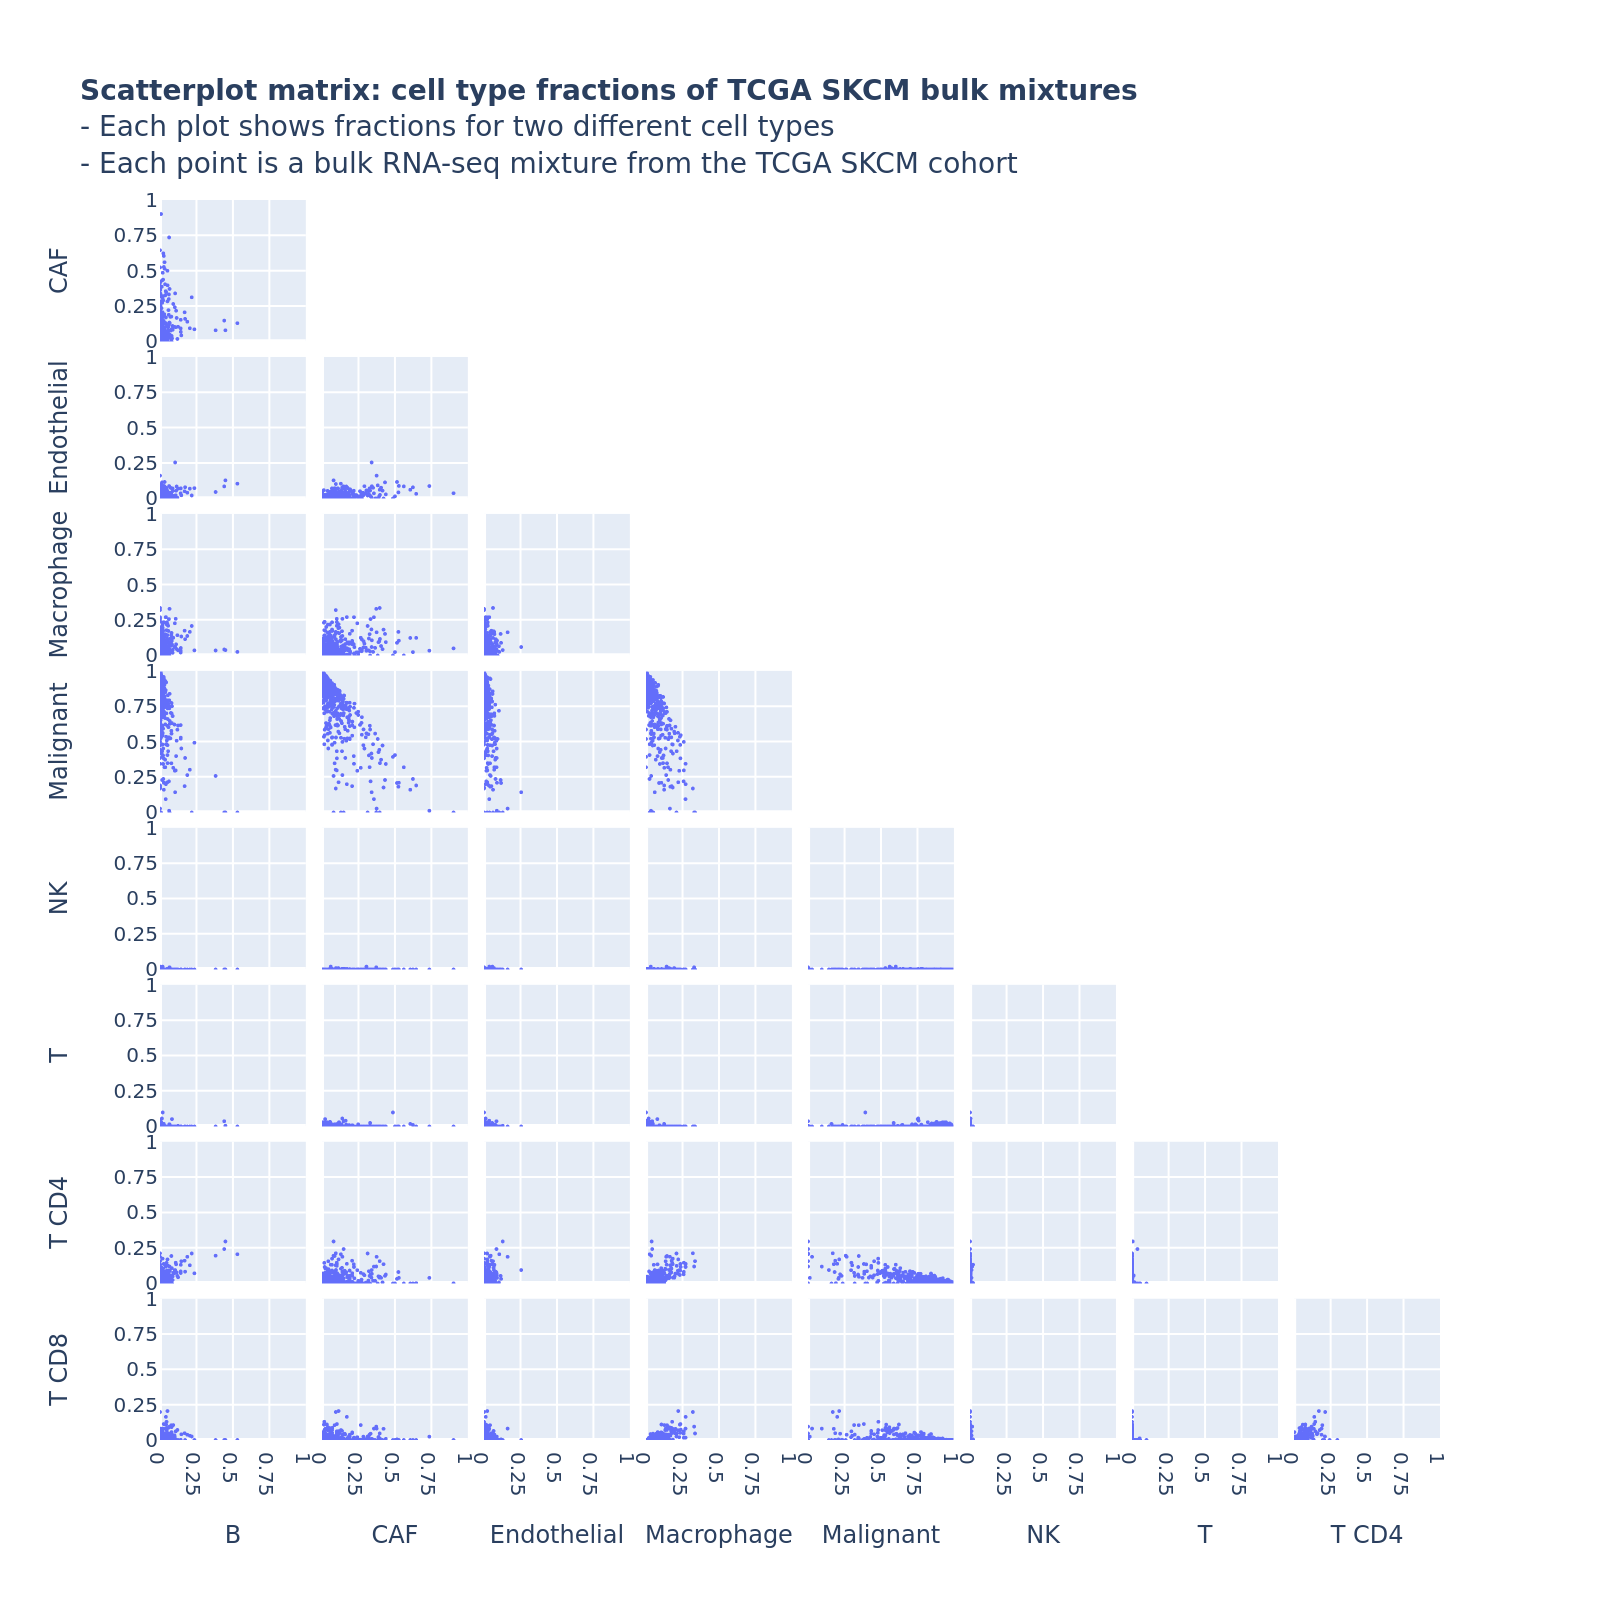

In [22]:
# for google presentations, which accepts 1600 x 1600

fig.show(width=800, height=800, scale=2, renderer="png")

In [23]:
# QA
# do all rows start with "TCGA"?
assert not any(filter(lambda name: name[0:4] != "TCGA", csx_fraction_output_tcga_skcm.index))

### compute pseudobulks from Jerby-Arnon cohort, fractions

In [24]:
import importlib

importlib.reload(helpers.creating_mixtures)

<module 'helpers.creating_mixtures' from '/home/jupyter/deconv/helpers/creating_mixtures.py'>

In [25]:
# params
rng = np.random.default_rng(seed=0)

In [26]:
in_silico_fractions = csx_fraction_output_tcga_skcm.rename(index=lambda sample: f"in_silico_like_{sample}")

In [27]:
in_silico_fractions.sample(3, random_state=rng)

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
Mixture,,,,,,,,,
in_silico_like_TCGA.ER.A19D.06A.11R.A18S.07,0.026560,0.528395,0.089195,0.105397,0.210770,0.000000,0.0,0.039683,0.000000
in_silico_like_TCGA.EE.A2GM.06B.11R.A18S.07,0.000641,0.013949,0.007678,0.005988,0.966328,0.000533,0.0,0.004882,0.000000
in_silico_like_TCGA.GN.A265.06A.21R.A18T.07,0.020668,0.322277,0.029096,0.120593,0.404974,0.000000,0.0,0.087133,0.015259


In [28]:
rng.bit_generator.state["state"] = {
    "state": 18792671013009471063546316241193924174,
    "inc": 87136372517582989555478159403783844777,
}

mixtures_in_silico, cell_type_geps = helpers.creating_mixtures.make_mixtures(
    sc_data,
    sc_metadata,
    in_silico_fractions,
    n_cells_per_gep=5,
    normalization_factor=1_000_000,
    rng=rng,
)

2022-03-14 18:15:41,259 - helpers.creating_mixtures - DEBUG - using np.random.Generator with BitGenerator state {'state': 18792671013009471063546316241193924174, 'inc': 87136372517582989555478159403783844777}
2022-03-14 18:15:41,280 - helpers.creating_mixtures - DEBUG - randomly chose Mel106 for malignant cells
2022-03-14 18:15:41,315 - helpers.creating_mixtures - DEBUG - randomly chose Mel102 for malignant cells
2022-03-14 18:15:41,346 - helpers.creating_mixtures - DEBUG - randomly chose Mel84 for malignant cells
2022-03-14 18:15:41,377 - helpers.creating_mixtures - DEBUG - randomly chose Mel94 for malignant cells
2022-03-14 18:15:41,411 - helpers.creating_mixtures - DEBUG - randomly chose Mel98 for malignant cells
2022-03-14 18:15:41,443 - helpers.creating_mixtures - DEBUG - randomly chose Mel84 for malignant cells
2022-03-14 18:15:41,474 - helpers.creating_mixtures - DEBUG - randomly chose Mel112 for malignant cells
2022-03-14 18:15:41,504 - helpers.creating_mixtures - DEBUG - rando

In [29]:
mixtures_in_silico

,in_silico_like_TCGA.3N.A9WB.06A.11R.A38C.07,in_silico_like_TCGA.3N.A9WC.06A.11R.A38C.07,in_silico_like_TCGA.3N.A9WD.06A.11R.A38C.07,in_silico_like_TCGA.BF.A1PU.01A.11R.A18S.07,in_silico_like_TCGA.BF.A1PV.01A.11R.A18U.07,in_silico_like_TCGA.BF.A1PX.01A.12R.A18T.07,in_silico_like_TCGA.BF.A1PZ.01A.11R.A18S.07,in_silico_like_TCGA.BF.A1Q0.01A.21R.A18S.07,in_silico_like_TCGA.BF.A3DJ.01A.11R.A20F.07,in_silico_like_TCGA.BF.A3DL.01A.11R.A20F.07,...,in_silico_like_TCGA.XV.AB01.06A.12R.A40A.07,in_silico_like_TCGA.YD.A89C.06A.11R.A37K.07,in_silico_like_TCGA.YD.A9TA.06A.11R.A39D.07,in_silico_like_TCGA.YD.A9TB.06A.12R.A40A.07,in_silico_like_TCGA.YG.AA3N.01A.11R.A38C.07,in_silico_like_TCGA.YG.AA3O.06A.11R.A38C.07,in_silico_like_TCGA.YG.AA3P.06A.11R.A38C.07,in_silico_like_TCGA.Z2.A8RT.06A.11R.A37K.07,in_silico_like_TCGA.Z2.AA3S.06A.11R.A39D.07,in_silico_like_TCGA.Z2.AA3V.06A.11R.A39D.07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,120.923842,12.287523,64.960287,27.339277,51.411645,25.753859,0.000000,94.917813,3.735661,70.012564,...,22.242714,8.928519,9.964749,24.213802,32.558221,37.340943,110.855591,92.702846,16.933403,68.964125
A1BG-AS1,0.353082,30.136803,70.473585,3.966097,4.590960,4.609824,0.089234,34.969695,1.636739,47.220603,...,3.976974,0.628659,26.200626,46.510831,2.942598,0.029121,0.000000,29.064219,51.750283,2.745737
A1CF,0.051326,1.264163,2.181628,0.361910,0.189239,3.751357,1.065898,2.793887,2.049993,2.385643,...,1.194224,0.689328,11.727392,0.234166,2.158212,0.410406,0.144990,0.317925,0.165665,0.438968
A2M,6.205342,45.912298,281.222741,293.954044,85.819247,180.655316,593.710076,117.345804,567.007191,16.963056,...,353.832807,296.260103,126.855676,314.741859,10.557259,437.666209,3.137548,192.113087,267.020903,290.897902
A2M-AS1,0.378255,6.838062,53.045326,0.853200,0.007781,84.227313,17.683852,0.477416,9.857964,0.267935,...,3.334119,80.987375,6.564708,2.409576,0.732169,51.195854,0.289137,6.277725,40.518955,3.289979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,15.275304,43.759787,42.321137,29.484973,25.238189,39.970189,57.281880,62.910220,47.791900,23.249741,...,25.735424,56.535005,86.317721,43.487239,64.555600,22.427083,16.218774,15.062658,47.305762,40.822675
ZYG11B,5.033480,64.529170,39.022011,51.343479,69.927921,40.908661,19.455952,46.586055,51.083122,64.127026,...,78.050794,38.234120,117.963677,57.821638,49.680079,62.642342,52.746566,90.835936,74.674265,68.763279
ZYX,278.682594,79.721027,112.787160,123.273389,50.559202,234.457588,2.445850,188.235267,60.606373,174.020085,...,109.923215,95.041817,146.863601,160.089981,91.172649,120.951131,175.690338,18.388240,127.842588,73.096646


In [30]:
sample_name = "in_silico_like_TCGA.3N.A9WB.06A.11R.A38C.07"
cell_type_geps[sample_name]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
gene_symbol,,,,,,,,,
A1BG,0.000000,37.954256,0.000000,32.533058,134.649960,0.000000,0.000000,0.000000,0.000000
A1BG-AS1,0.000000,19.687740,0.689387,0.000000,0.000000,0.000000,0.000000,5.808036,0.000000
A1CF,8.650248,0.213915,1.093455,0.000000,0.000000,30.356998,7.116651,1.597216,2.274634
A2M,0.000000,247.462363,485.752274,326.161308,0.000000,111.651218,0.000000,16.598491,0.000000
A2M-AS1,0.000000,0.000000,4.008561,0.000000,0.000000,42.567627,56.912632,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
ZYG11A,119.552057,23.499738,67.214217,74.857396,13.745418,116.353140,119.993616,180.403397,119.236541
ZYG11B,75.421955,86.915576,75.261194,41.517696,3.100465,97.436999,91.094261,114.151046,61.416119
ZYX,82.084720,215.753807,140.927868,148.210118,310.001548,152.829087,0.000000,23.209841,130.373140


## QA

### exclude genes not in both TCGA bulks, pseudobulks

looks like not really... # rows in expression data:
- TCGA SKCM: 20,531
- in silico mixtures (jerby-arnon): 23,686
- overlap: 18,762

In [31]:
mixtures_tcga_skcm.shape

(20531, 473)

In [32]:
mixtures_in_silico.shape

(23686, 473)

In [33]:
len(mixtures_tcga_skcm.index.intersection(mixtures_in_silico.index))

18762

random genes in jerby-arnon, not in TCGA SKCM:

In [34]:
# todo

random genes in TCGA SKCM, not in jerby-arnon:

In [35]:
# todo

#### percent of gene symbols in one but not both cohorts

In [36]:
label_real = "real (tcga skcm)"
label_pseudo = "pseudo (jerby-arnon derived)"

In [37]:
pd.concat(
    {
        label_real: mixtures_tcga_skcm.mean(axis="columns"),
        label_pseudo: mixtures_in_silico.mean(axis="columns"),
    },
    axis=1,
).isnull().any(axis=1).mean()

0.2629345904537419

In [38]:
genes_in_common = mixtures_tcga_skcm.index.intersection(mixtures_in_silico.index)

In [39]:
genes_in_common

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AADAC', 'AADACL2',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='gene_symbol', length=18762)

In [40]:
len(mixtures_tcga_skcm), len(mixtures_in_silico)

(20531, 23686)

#### bookmark

In [41]:
mixtures_tcga_skcm = mixtures_tcga_skcm.loc[genes_in_common]
mixtures_in_silico = mixtures_in_silico.loc[genes_in_common]

In [42]:
len(mixtures_tcga_skcm), len(mixtures_in_silico)

(18762, 18762)

### eliminate genes with sparse expression in TCGA SKCM

In [43]:
sparse_genes_in_tcga_skcm = (mixtures_tcga_skcm == 0).mean(axis=1) > 0.1

In [44]:
sparse_genes_in_tcga_skcm

gene_symbol
A1BG      False
A1CF       True
A2M       False
A2ML1      True
A4GALT    False
          ...  
ZYG11A     True
ZYG11B    False
ZYX       False
ZZEF1     False
ZZZ3      False
Length: 18762, dtype: bool

In [45]:
sparse_genes_in_tcga_skcm.mean()

0.24469672742777956

#### bookmark

In [46]:
mixtures_tcga_skcm = mixtures_tcga_skcm.loc[~sparse_genes_in_tcga_skcm]
mixtures_in_silico = mixtures_in_silico.loc[~sparse_genes_in_tcga_skcm]

### limit samples to metastases (not primaries)

In [47]:
query = '''
select sample_barcode, sample_gdc_id, case_barcode, case_gdc_id, sample_type, sample_type_name, program_name, project_short_name
from `isb-cgc-bq.TCGA.biospecimen_gdc_current`
where sample_type_name = "Metastatic" and project_short_name = "TCGA-SKCM"
'''

samples_mets = pd.read_gbq(query, project_id="keen-dispatch-316219")

In [62]:
samples_mets

,sample_barcode,sample_gdc_id,case_barcode,case_gdc_id,sample_type,sample_type_name,program_name,project_short_name
0,TCGA-GN-A4U4-06A,12dc3f5a-49a4-4f56-935d-eb09a6789523,TCGA-GN-A4U4,6dc9c5b0-77e6-4c53-a75c-8f01731c54e8,06,Metastatic,TCGA,TCGA-SKCM
1,TCGA-D3-A2JG-06A,a676720b-27eb-463a-acd5-44801d2cb9ac,TCGA-D3-A2JG,47a16bf2-229b-4e9a-8b5e-3dcc61fa9106,06,Metastatic,TCGA,TCGA-SKCM
2,TCGA-EE-A29H-06A,92ae970d-75b4-4d9f-b84f-a2070f0cbe90,TCGA-EE-A29H,c8ba1856-d055-4dc6-a184-72763c76aae4,06,Metastatic,TCGA,TCGA-SKCM
3,TCGA-BF-AAP0-06A,3283b6c7-024d-47d5-bbf0-74b7e69c3469,TCGA-BF-AAP0,5f07d78a-44a1-4002-a55c-5fe01b35d669,06,Metastatic,TCGA,TCGA-SKCM
4,TCGA-EE-A3AD-06A,e7941552-18d8-4ae4-a9bf-5530a046cbbf,TCGA-EE-A3AD,0f1fb775-c4a2-4a1e-8b09-f935233cdaee,06,Metastatic,TCGA,TCGA-SKCM
...,...,...,...,...,...,...,...,...
364,TCGA-EE-A29B-06A,73ed3aa7-1aad-42b6-ac8a-1ca284a75a48,TCGA-EE-A29B,905ea29f-588a-497b-9f06-2eef3bdc9442,06,Metastatic,TCGA,TCGA-SKCM
365,TCGA-FS-A4F5-06A,881cfcc8-bfcf-4404-8742-5be9be653412,TCGA-FS-A4F5,87dc5c05-3121-46bf-adba-061f45cecf27,06,Metastatic,TCGA,TCGA-SKCM
366,TCGA-QB-AA9O-06A,8126465a-6d29-4a50-ade6-b81bf0046a89,TCGA-QB-AA9O,2bdb65a5-4b72-4379-822d-69cc41fd663f,06,Metastatic,TCGA,TCGA-SKCM
367,TCGA-GN-A261-06A,None,TCGA-GN-A261,None,06,Metastatic,TCGA,TCGA-SKCM


In [48]:
def is_a_metastasis(sample_id):
    return sample_id[:16] in samples_mets["sample_barcode"].values

#### bookmark

In [65]:
samples_mets["sample_barcode"]

0      TCGA-GN-A4U4-06A
1      TCGA-D3-A2JG-06A
2      TCGA-EE-A29H-06A
3      TCGA-BF-AAP0-06A
4      TCGA-EE-A3AD-06A
             ...       
364    TCGA-EE-A29B-06A
365    TCGA-FS-A4F5-06A
366    TCGA-QB-AA9O-06A
367    TCGA-GN-A261-06A
368    TCGA-EE-A3AF-06A
Name: sample_barcode, Length: 369, dtype: object

In [49]:
sample_ids_mets = list(filter(is_a_metastasis, mixtures_tcga_skcm.columns))

In [ ]:
mixtures_tcga_skcm = mixtures_tcga_skcm[sample_ids_mets]

In [53]:
mixtures_in_silico

,in_silico_like_TCGA.3N.A9WB.06A.11R.A38C.07,in_silico_like_TCGA.3N.A9WC.06A.11R.A38C.07,in_silico_like_TCGA.3N.A9WD.06A.11R.A38C.07,in_silico_like_TCGA.BF.A1PU.01A.11R.A18S.07,in_silico_like_TCGA.BF.A1PV.01A.11R.A18U.07,in_silico_like_TCGA.BF.A1PX.01A.12R.A18T.07,in_silico_like_TCGA.BF.A1PZ.01A.11R.A18S.07,in_silico_like_TCGA.BF.A1Q0.01A.21R.A18S.07,in_silico_like_TCGA.BF.A3DJ.01A.11R.A20F.07,in_silico_like_TCGA.BF.A3DL.01A.11R.A20F.07,...,in_silico_like_TCGA.XV.AB01.06A.12R.A40A.07,in_silico_like_TCGA.YD.A89C.06A.11R.A37K.07,in_silico_like_TCGA.YD.A9TA.06A.11R.A39D.07,in_silico_like_TCGA.YD.A9TB.06A.12R.A40A.07,in_silico_like_TCGA.YG.AA3N.01A.11R.A38C.07,in_silico_like_TCGA.YG.AA3O.06A.11R.A38C.07,in_silico_like_TCGA.YG.AA3P.06A.11R.A38C.07,in_silico_like_TCGA.Z2.A8RT.06A.11R.A37K.07,in_silico_like_TCGA.Z2.AA3S.06A.11R.A39D.07,in_silico_like_TCGA.Z2.AA3V.06A.11R.A39D.07
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,120.923842,12.287523,64.960287,27.339277,51.411645,25.753859,0.000000,94.917813,3.735661,70.012564,...,22.242714,8.928519,9.964749,24.213802,32.558221,37.340943,110.855591,92.702846,16.933403,68.964125
A2M,6.205342,45.912298,281.222741,293.954044,85.819247,180.655316,593.710076,117.345804,567.007191,16.963056,...,353.832807,296.260103,126.855676,314.741859,10.557259,437.666209,3.137548,192.113087,267.020903,290.897902
A4GALT,3.281390,2.042592,6.506175,3.639106,0.423581,19.446734,0.658259,12.134946,5.359097,1.212931,...,12.870096,31.753582,17.899725,26.917776,0.508620,6.777097,0.379921,3.380247,0.000000,7.402954
AAAS,181.441669,120.997562,62.794284,186.802606,95.207216,75.653674,108.821522,23.942720,128.405202,177.206845,...,143.860681,114.744460,73.497213,195.597196,117.591610,86.759852,127.219747,127.699631,58.211728,162.536880
AACS,0.252982,12.389050,11.817677,106.975901,145.954662,15.201488,73.261171,10.511355,1.160631,4.700556,...,46.838866,89.515773,21.402367,23.264232,1.122939,37.161096,72.245107,0.053418,0.000000,14.984904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,10.696135,28.484546,33.520377,21.908760,11.078702,39.389460,15.028975,57.965409,32.945921,41.651439,...,17.371978,23.825188,88.523564,56.746474,65.050111,60.627744,90.093552,18.430026,20.083077,23.955101
ZYG11B,5.033480,64.529170,39.022011,51.343479,69.927921,40.908661,19.455952,46.586055,51.083122,64.127026,...,78.050794,38.234120,117.963677,57.821638,49.680079,62.642342,52.746566,90.835936,74.674265,68.763279
ZYX,278.682594,79.721027,112.787160,123.273389,50.559202,234.457588,2.445850,188.235267,60.606373,174.020085,...,109.923215,95.041817,146.863601,160.089981,91.172649,120.951131,175.690338,18.388240,127.842588,73.096646


## finishing touches

### normalize expression to TPM

In [ ]:
mixtures_tcga_skcm = helpers.creating_mixtures.normalize_expression(mixtures_tcga_skcm, 1_000_000)
mixtures_in_silico = helpers.creating_mixtures.normalize_expression(mixtures_in_silico, 1_000_000)

# output 1: compare distributions of real vs pseudo mixtures

## comparison: mean(gene expression)

### prep (compute mean expression per gene, real and pseudo)

In [ ]:
pd.concat(
    {
        label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: mixtures_in_silico.mean(axis=1),
    },
    axis=1,
)

### correlations

#### mean(gene expression)

In [ ]:
pd.concat(
    {
        label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: mixtures_in_silico.mean(axis=1),
    },
    axis=1,
).corr()

#### mean(log(gene expression + 1))

In [ ]:
pd.concat(
    {
        label_real: np.log(mixtures_tcga_skcm + 1).mean(axis=1),
        label_pseudo: np.log(mixtures_in_silico + 1).mean(axis=1),
    },
    axis=1,
).corr()

### hist plots

#### log scale

In [ ]:
title = (
    "<b>Distribution of gene expression means: in silico vs real (TCGA SKCM)</b>"
    "<br>* mean is computed within each cohort, then log transformed for this plot"
)

fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=np.log10(mixtures_tcga_skcm.mean(axis=1) + 1e-4),
        histnorm="percent",
        name="TCGA SKCM",  # name used in legend and hover labels
        xbins=dict(start=-4.0, end=10.0, size=0.5),  # bins used for histogram
        opacity=0.75,
    )
)
fig.add_trace(
    go.Histogram(
        x=np.log10(mixtures_in_silico.mean(axis=1) + 1e-4),
        histnorm="percent",
        name="pseudobulks derived from scRNA-seq",
        xbins=dict(start=-3.0, end=10, size=0.5),
        # marker_color='#330C73',
        opacity=0.75,
    )
)
fig.update_layout(
    title_text=title,  # title of plot
    xaxis_title_text="log(mean expression + 1e-4)",  # xaxis label
    yaxis_title_text="Count",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
# fig.update_xaxes(type="log")
fig.show()

In [ ]:
df = pd.concat(
    {
        label_real: np.log10(mixtures_tcga_skcm.std(axis=1) + 1e-4),
        # label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: np.log10(mixtures_in_silico.std(axis=1) + 1e-4),
        # label_pseudo: mixtures_in_silico.mean(axis=1),
    },
    axis=1,
)
title = (
    "<b>Gene expression stddevs: in silico vs real (TCGA SKCM)</b>"
    "<br>* stddevs by gene are computed within each cohort, then log <br>transformed for this plot"
)

fig = px.histogram(
    df,
    barmode="group",
    # log_x=True,
    nbins=20,
    title=title,
)
fig.update_layout(
    xaxis_title="log(stddev(expression) + 1e-4)",  # xaxis label
)
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.9,
        xanchor="left",
        x=0.1,
    )
)

In [ ]:
fig.show(width=800, height=500, scale=2, renderer="png")

### scatter plot

#### log scale

In [ ]:
mixtures_in_silico.mean(axis=1).describe(percentiles=np.arange(0, 1, 0.05))

In [ ]:
df = pd.DataFrame(
    {
        label_real: np.log10(mixtures_tcga_skcm.mean(axis=1) + 1e-4),
        f"{label_real} sparsity": (mixtures_tcga_skcm == 0).mean(axis=1),
        label_pseudo: np.log10(mixtures_in_silico.mean(axis=1) + 1e-4),
        f"{label_pseudo} sparsity": (mixtures_in_silico == 0).mean(axis=1),
    },
    # axis=1,
)

# df = df.loc[(mixtures_tcga_skcm == 0).mean(axis=1) < 0.1]

# df[label_real+" - nonzero"] = df[label_real] != 0

title = (
    "<b>Gene expression means: in silico vs real (TCGA SKCM)</b>"
    "<br>* each point is a gene"
    "<br>* mean is computed within each cohort, then log transformed"
)

fig = px.scatter(
    df,
    x=label_real,
    y=label_pseudo,
    title=title,
    marginal_x="histogram",
    marginal_y="histogram",
    hover_name=df.index,
    hover_data=df.columns,
)
fig.add_trace(
    go.Scatter(
        x=[df.values.min(), df.values.max()],
        y=[df.values.min(), df.values.max()],
        marker_color="black",
        showlegend=False,
        mode="lines",
    ),
    row=1,
    col=1,
)
fig.update_traces(marker=dict(size=1), row=1, col=1)
fig.update_xaxes(
    title="TCGA SKCM mixtures: log(mean expression + 1e-4)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.update_yaxes(
    title="In silico mixtures: log(mean expression + 1e-4)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.show(height=800)

In [ ]:
fig.show(width=800, height=700, scale=2, renderer="png")

### K-S comparison

In [ ]:
import scipy.stats

#### mean(gene expression)

In [ ]:
scipy.stats.kstest(mixtures_tcga_skcm.mean(axis=1), mixtures_in_silico.mean(axis=1))

#### mean(log(gene expression + 1))

In [ ]:
scipy.stats.kstest(np.log10(mixtures_tcga_skcm + 1e-4).mean(axis=1), np.log10(mixtures_in_silico + 1e-4).mean(axis=1))

#### sanity test (testing random splits of TCGA SKCM)

In [ ]:
columns = list(mixtures_tcga_skcm.columns)
np.random.default_rng().shuffle(columns)
group_a, group_b = columns[0::2], columns[1::2]

# print(columns[:6])
# print(group_a[:3])
# print(group_b[:3])

scipy.stats.kstest(mixtures_tcga_skcm[group_a].mean(axis=1), mixtures_tcga_skcm[group_b].mean(axis=1))

#### plot of CDFs

In [ ]:
df = pd.concat(
    {
        label_real: (mixtures_tcga_skcm.mean(axis=1).sort_values().cumsum() * 1e-6).reset_index(drop=True),
        label_pseudo: (mixtures_in_silico.mean(axis=1).sort_values().cumsum() * 1e-6).reset_index(drop=True),
    },
    axis=1,
)

px.scatter(
    df,
    title=("Cumulative distribution (CDF) of mean gene expression"),
)

In [ ]:
max(abs(df.iloc[:, 0] - df.iloc[:, 1]))

##### (ignore) - trying plotly.express.ecdf

In [ ]:
pd.DataFrame(
    {
        label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: mixtures_in_silico.mean(axis=1),
    }
).rank()

In [ ]:
df = pd.DataFrame(
    {
        label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: mixtures_in_silico.mean(axis=1),
    }
)

px.ecdf(df, x=[label_real, label_pseudo])

### PCA

In [ ]:
df = pd.concat([mixtures_tcga_skcm, mixtures_in_silico], axis=1).T
sample_origin = df.index.map(lambda x: "in silico" if x[:9] == "in_silico" else "TCGA SKCM")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df.values[:] = scaler.transform(df)

In [ ]:
print(df.iloc[:, :10].mean())
print(df.iloc[:, :10].std())

In [ ]:
features = list(df.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
components = pca.fit_transform(df)

In [ ]:
pca.explained_variance_[:10]

In [ ]:
sum(pca.explained_variance_)

In [ ]:
labels = {str(i): f"PC {i+1}<br>({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

In [ ]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=sample_origin,
    hover_name=df.index,
)
fig.update_traces(diagonal_visible=False, marker=dict(size=2))

In [ ]:
fig.show(width=800, height=700, scale=2, renderer="png")

In [ ]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(8),
    color=sample_origin,
    hover_name=df.index,
)
fig.update_traces(diagonal_visible=False, marker=dict(size=1))
fig.show()

In [ ]:
fig.show(width=800, height=700, scale=2, renderer="png")

In [ ]:
def make_fig():
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter_3d(
        components,
        x=0,
        y=1,
        z=2,
        color=sample_origin,
        title=f"Total Explained Variance: {total_var:.2f}%",
        labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
        hover_name=df.index,
    )
    fig.update_traces(marker=dict(size=1))
    fig.update_layout(showlegend=False)
    return fig


fig = make_fig()

In [ ]:
fig.show(width=800, height=700, scale=2, renderer="png")

### expression distribution of low-expression genes

In [ ]:
print("percent of genes that are expressed in fewer than half of samples")

gene_is_expressed = mixtures_tcga_skcm > 0
how_often_each_gene_is_expressed = gene_is_expressed.mean(axis=1)
(how_often_each_gene_is_expressed < 0.5).mean()

In [ ]:
print("percent of genes that are expressed in fewer than half of samples")

gene_is_expressed = mixtures_in_silico > 0
how_often_each_gene_is_expressed = gene_is_expressed.mean(axis=1)
(how_often_each_gene_is_expressed < 0.5).mean()

### appendix - other comparisons

In [ ]:
df = pd.DataFrame({"tcga skcm real": mixtures_tcga_skcm.sum(), "jerby-arnon in silico": mixtures_in_silico.sum()})

px.scatter(df)

In [ ]:
mixtures_tcga_skcm.mean(axis=1).describe()

In [ ]:
mixtures_in_silico.mean(axis=1).describe()

## comparison: stddev(gene expression)

### correlations

#### stddev(gene expression)

In [ ]:
pd.concat(
    {
        label_real: mixtures_tcga_skcm.std(axis=1),
        label_pseudo: mixtures_in_silico.std(axis=1),
    },
    axis=1,
).corr()

#### stddev(log(gene expression + 1))

In [ ]:
pd.concat(
    {
        label_real: np.log(mixtures_tcga_skcm + 1).std(axis=1),
        label_pseudo: np.log(mixtures_in_silico + 1).std(axis=1),
    },
    axis=1,
).corr()

### scatter plot

#### log scale

In [ ]:
df = pd.concat(
    {
        label_real: np.log10(mixtures_tcga_skcm.std(axis=1) + 1e-4),
        label_pseudo: np.log10(mixtures_in_silico.std(axis=1) + 1e-4),
    },
    axis=1,
)

title = (
    "<b>Gene expression stddevs: in silico vs real (TCGA SKCM)</b>"
    "<br>* each point is a gene"
    "<br>* stddev by gene is computed within each cohort, then log transformed"
)

fig = px.scatter(
    df,
    x=label_real,
    y=label_pseudo,
    title=title,
    marginal_x="histogram",
    marginal_y="histogram",
    hover_name=df.index,
)
fig.add_trace(
    go.Scatter(
        x=[df.values.min(), df.values.max()],
        y=[df.values.min(), df.values.max()],
        marker_color="black",
        showlegend=False,
        mode="lines",
    ),
    row=1,
    col=1,
)
fig.update_traces(marker=dict(size=1), row=1, col=1)
fig.update_xaxes(
    title="TCGA SKCM mixtures: log(stddev expression + 1e-4)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.update_yaxes(
    title="In silico mixtures: log(stddev expression + 1e-4)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.show(height=800)

In [ ]:
fig.show(width=800, height=700, scale=2, renderer="png")

In [ ]:
df = pd.concat(
    {
        label_real: mixtures_tcga_skcm.std(axis=1),
        label_pseudo: mixtures_in_silico.std(axis=1),
    },
    axis=1,
)

title = (
    "<b>Gene expression stddevs: in silico vs real (TCGA SKCM)</b>"
    "<br>* each point is a gene"
    "<br>* stddev by gene is computed within each cohort, then log transformed"
)

fig = px.scatter(
    df,
    x=label_real,
    y=label_pseudo,
    title=title,
    marginal_x="box",
    marginal_y="box",
    hover_name=df.index,
    log_x=True,
    log_y=True,
)
fig.add_trace(
    go.Scatter(
        x=[0, df.values.max()],
        y=[0, df.values.max()],
        marker_color="black",
        showlegend=False,
        mode="lines",
    ),
    row=1,
    col=1,
)
fig.update_traces(marker=dict(size=2), row=1, col=1)
fig.update_xaxes(
    title="TCGA SKCM mixtures: stddev(expression)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.update_yaxes(
    title="In silico mixtures: stddev(expression)",
    rangemode="tozero",
    dtick=1,
    row=1,
    col=1,
)  # , range=[0, 10])  # , type="log")
fig.show(height=800)

## plot summary stats

by gene, in silico vs real

In [ ]:
def prep_for_plots(mixtures):
    mean_expression_per_gene = mixtures.mean(axis=1)
    return np.log(mean_expression_per_gene + 1)

In [ ]:
series = [
    prep_for_plots(mixtures_tcga_skcm),
    prep_for_plots(mixtures_in_silico),
]

ff.create_distplot(series, ["tcga", "in silico"], show_rug=False, show_hist=True, bin_size=0.5)

In [ ]:
mixtures_tcga_skcm_per_million = helpers.creating_mixtures.normalize_expression(mixtures_tcga_skcm, 1_000_000)

series = [
    prep_for_plots(mixtures_tcga_skcm_per_million),
    prep_for_plots(mixtures_in_silico),
]

ff.create_distplot(series, ["tcga (tpm)", "in silico"], show_rug=False, show_hist=True)

In [ ]:
def compute_means(mixtures):
    base_means = mixtures_tcga_skcm.mean(axis=1)
    return np.log(base_means + 1)


mean_expressions = pd.DataFrame(
    {
        "TCGA SKCM": compute_means(mixtures_tcga_skcm),
        "in silico": compute_means(mixtures_in_silico),
    }
)

In [ ]:
compute_means(mixtures_tcga_skcm)

In [ ]:
compute_means(mixtures_in_silico)

In [ ]:
px.box(compute_means(mixtures_tcga_skcm))

In [ ]:
assert False, "stop executing cells"

In [ ]:
# px.box([compute_means(mixtures_tcga_skcm), compute_means(mixtures_in_silico)])

# output 1 junkyard

## comparison: total counts

In [ ]:
df = pd.DataFrame(
    {
        label_real: mixtures_tcga_skcm.sum(),
        label_pseudo: mixtures_in_silico.sum(),
    }
)

fig = px.scatter(
    df,
    x=label_real,
    y=label_pseudo,
    title="Scatter plot of real vs pseudobulk mixtures: sum of counts per sample",
)
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")

## scatter

#### linear scale

In [ ]:
df = pd.concat(
    {
        label_real: mixtures_tcga_skcm.mean(axis=1),
        label_pseudo: mixtures_in_silico.mean(axis=1),
    },
    axis=1,
)

fig = px.scatter(
    df.sample(5000),
    x=label_real,
    y=label_pseudo,
    title="Scatter plot of real vs pseudobulk mixtures: mean expression per gene",
    # trendline="ols",
    # marginal_x="histogram",
    # marginal_y="histogram",
)
fig.update_xaxes(rangemode="tozero", type="log")
fig.update_yaxes(rangemode="tozero", type="log")
fig.show(width=800, height=800, scale=2)

# output 2: estimated cell type fractions

## run cibersortx fractions on in silico mixtures

In [ ]:
import tempfile

In [ ]:
temp_dir = tempfile.TemporaryDirectory()

print(temp_dir)

In [ ]:
from helpers.running_csx import DockerJob, Experiment, InputFile

In [ ]:
experiments_root = "gs://liulab/csx_experiments/tcga_skcm_fractions"
experiment = Experiment(experiments_root, "test1")

In [ ]:
!tree -h {experiment.local_path}/..

In [ ]:
input_file_args = {
    "mixture": InputFile(
        "mixturestirosh.txt",
        "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt",
    ),
    "sigmatrix": InputFile(),
}

In [ ]:

job = DockerJob(temp_dir, input_file_args, other_args)
    for copy_command in job.make_copy_commands():
        !{copy_command}
    !tree -h {job.path}
    docker_command = job.make_docker_command()
    print(docker_command)
    !{docker_command}
    !tree -h {job.path}
    !gsutil -m rsync -r -d {job.path} {experiment.gcs_uri}


### prep input files

In [ ]:
from helpers.csx_docker import save_valid_mixture_file, save_valid_fractions_file

with open("mixture.txt", "w") as f:
    save_valid_mixture_file(mixtures, f)
with open("fractions.txt", "w") as f:
    save_valid_fractions_file(fractions, f)

### run cibersortx

In [ ]:
run_csx(path="...")

### load and process outputs

## evaluate results

# output 3: estimated gene expression by cell type

## run cibersortx expression imputation on in silico mixtures

## volcano plot outputs

In [ ]:
# for each cell type, scatter plot (effect_size, p_value) for each gene